In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, LSTM, RepeatVector

# Load data
data = pd.read_excel('ex1.xlsx')
original_amplitude = data['Amplitude'].values
noised_amplitude = data['Amplitude_noise'].values

# Reshape and scale data
original_amplitude = original_amplitude.reshape(-1, 1)
noised_amplitude = noised_amplitude.reshape(-1, 1)

scaler = MinMaxScaler()
original_amplitude = scaler.fit_transform(original_amplitude)
noised_amplitude = scaler.transform(noised_amplitude)

# Windowing function
window_size = 4500

def create_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i + window_size])
    return np.array(windows)

X = create_windows(noised_amplitude, window_size)
y = create_windows(original_amplitude, window_size)

# Reshape for training
X_train = X.reshape(-1, window_size, 1)
y_train = y.reshape(-1, window_size, 1)


In [8]:

# Conv1D Autoencoder Model
input_signal = Input(shape=(window_size, 1))
x = Conv1D(16, 3, activation='relu', padding='same')(input_signal)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

x = Conv1D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='relu', padding='same')(x)

autoencoder = Model(input_signal, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train Conv1D Autoencoder
autoencoder.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
denoised_signal = autoencoder.predict(X_train)
denoised_signal = scaler.inverse_transform(denoised_signal.reshape(-1, 1))


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step - loss: 0.2526 - val_loss: 0.1544
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - loss: 0.1244 - val_loss: 0.0546
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 393ms/step - loss: 0.0425 - val_loss: 0.0270
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 0.0293 - val_loss: 0.0291
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 0.0268 - val_loss: 0.0188
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 0.0187 - val_loss: 0.0167
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - loss: 0.0150 - val_loss: 0.0092
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - loss: 0.0084 - val_loss: 0.0042
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 0.0020 - val_lo

In [4]:

# LSTM Autoencoder Model
input_signal_lstm = Input(shape=(window_size, 1))
encoded_lstm = LSTM(64, activation='relu', return_sequences=True)(input_signal_lstm)
encoded_lstm = LSTM(32, activation='relu', return_sequences=False)(encoded_lstm)

decoded_lstm = RepeatVector(window_size)(encoded_lstm)
decoded_lstm = LSTM(32, activation='relu', return_sequences=True)(decoded_lstm)
decoded_lstm = LSTM(64, activation='relu', return_sequences=True)(decoded_lstm)
decoded_lstm = Conv1D(1, 3, activation='relu', padding='same')(decoded_lstm)

lstm_autoencoder = Model(input_signal_lstm, decoded_lstm)
lstm_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM Autoencoder
lstm_autoencoder.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
denoised_signal_lstm = lstm_autoencoder.predict(X_train)
denoised_signal_lstm = scaler.inverse_transform(denoised_signal_lstm.reshape(-1, 1))


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 123s 16s/step - loss: 0.3451 - val_loss: 0.2366
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 109s 16s/step - loss: 0.2043 - val_loss: 0.1304
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 146s 16s/step - loss: 0.1466 - val_loss: 0.1301
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 140s 16s/step - loss: 0.1371 - val_loss: 0.1301
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 141s 16s/step - loss: 0.1329 - val_loss: 0.1283
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 141s 16s/step - loss: 0.1305 - val_loss: 0.1280
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 144s 16s/step - loss: 0.1282 - val_loss: 0.1276
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 110s 16s/step - loss: 0.1269 - val_loss: 0.1275
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 16s/step - loss: 0.1258 - val_loss: 0.1279
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 114s 16s/step - loss: 0.1257 - val_loss: 0.1278
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 137s 16s/step - loss: 0.1256 - val_loss: 0.1276
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 16s/step - loss: 0.1256 - val_lo

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D
from tensorflow.keras.optimizers import Adam

# Define the input layer
input_signal = Input(shape=(4500, 1))

# Build the convolutional layers
x = Conv1D(16, kernel_size=3, activation='relu', padding='same')(input_signal)
x = MaxPooling1D(pool_size=2, padding='same')(x)
x = Conv1D(8, kernel_size=3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(pool_size=2, padding='same')(x)

# Build the upsampling layers
x = Conv1D(8, kernel_size=3, activation='relu', padding='same')(encoded)
x = UpSampling1D(size=2)(x)
x = Conv1D(16, kernel_size=3, activation='relu', padding='same')(x)
x = UpSampling1D(size=2)(x)
decoded = Conv1D(1, kernel_size=3, activation='relu', padding='same')(x)

# Compile the model
conv2_autoencoder = Model(inputs=input_signal, outputs=decoded)
conv2_autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
conv2_autoencoder.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
denoised_signal_conv2 = conv2_autoencoder.predict(X_train)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - loss: 0.3319 - val_loss: 0.2741
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.2456 - val_loss: 0.1772
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - loss: 0.1488 - val_loss: 0.0755
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - loss: 0.0585 - val_loss: 0.0341
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - loss: 0.0380 - val_loss: 0.0439
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.0408 - val_loss: 0.0285
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 0.0280 - val_loss: 0.0283
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - loss: 0.0274 - val_loss: 0.0243
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - loss: 0.0231 - val_loss: 0.0205
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 0.0201 - val_loss: 0.0176
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 0.0169 - val_loss: 0.0143
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - loss: 0.0134 - val_lo

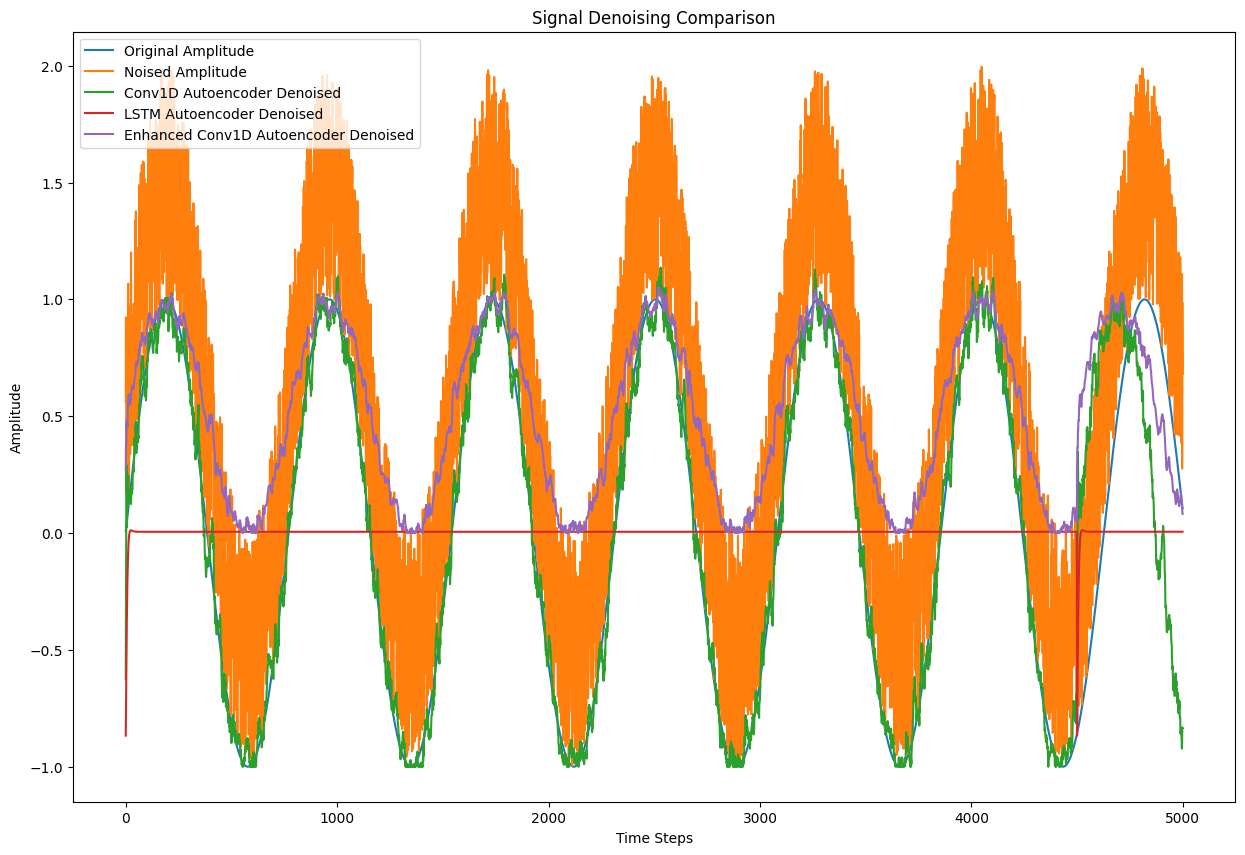

In [11]:

# Visualization
time_steps = np.arange(len(data))
plt.figure(figsize=(15, 10))
plt.plot(time_steps, data['Amplitude'], label='Original Amplitude')
plt.plot(time_steps, data['Amplitude_noise'], label='Noised Amplitude')
plt.plot(time_steps, denoised_signal.flatten()[:len(data)], label='Conv1D Autoencoder Denoised')
plt.plot(time_steps, denoised_signal_lstm.flatten()[:len(data)], label='LSTM Autoencoder Denoised')
plt.plot(time_steps, denoised_signal_conv2.flatten()[:len(data)], label='Enhanced Conv1D Autoencoder Denoised')

plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.title('Signal Denoising Comparison')
plt.legend()
plt.show()
